## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning


## Que hacer
- Diseñarás y aplicarás un modelo de clustering.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para cluestering y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, es por ello que es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por ello que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que según sus informes son los más importantes para la aplicación de este programa, esos seis puntos son:
- **Salario mensual**, indica el ingreso mensual en pesos mexicanos que tiene el cliente. 
- **Crédito tipo 1**, es un producto financiero que el cliente ha obtenido de la institución financiera, `1` es que tiene este producto y `0` es que no.
- **Crédito tipo 2**, es similar a la característica anterior, `1` es que tiene el producto y `0` que no.
- **Límite de TC**, indica el límite de crédito de la tarjeta de cliente.
- **Años siendo cliente**, son los años que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto**, es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`)o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente necesita que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes, para ello usa el método del codo y grafícalo, recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos deberás aplicar un método de clustering, el cliente solicita que les muestres gráficamente cómo están organizados los clientes, puedes usar una gráfica de dispersión o el que creas más conveniente.

Incluye por lo menos un índice de desempeño (scoring) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar lo más presentable posible, puedes usar **Pyplot** o **Seaborn**.

Deberás escribr un texto explicando qué representa tu análisis, usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como el beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar tu primer modelo y aplicarlo en estos nuevos clientes, no olvides graficarlos (sólo a los nuevos 50 clientes).


## Para hacer:

Modelar clustering correctamente:
- Determinar el número máximo de clusters y aplicar PCA.
- Hacer el diagrama de codo.
- Seleccionar y entrenar modelo.
- Generar visualización de datos.
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from  functools import reduce
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install pyclustering
from pyclustering.cluster.kmeans import kmeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1. DataScienci/proyectoModulo_4/costumers.csv')

## Analisis explotratorio

In [ ]:
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


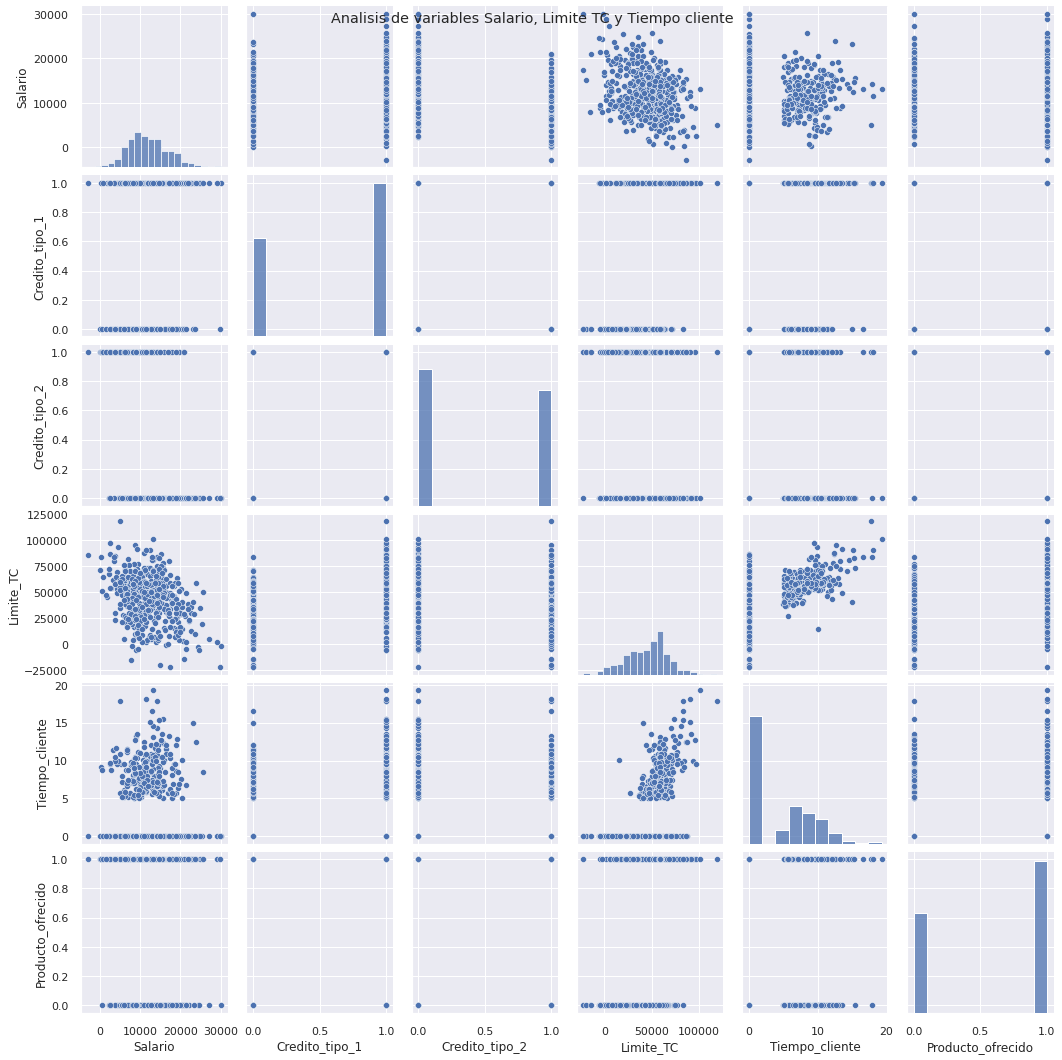

In [ ]:
sns.set()
cols = ['Salario',	'Credito_tipo_1',	'Credito_tipo_2',	'Limite_TC',	'Tiempo_cliente', 'Producto_ofrecido']
g_Dispercion = sns.pairplot(df, x_vars = cols, y_vars = cols)
g_Dispercion.fig.suptitle('Analisis de variables Salario, Limite TC y Tiempo cliente')
plt.show();

Grafica que nos muestra el contexto de como actuan las variables entre si

In [ ]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


Al ver que hay valores inferiores a cero, vamos a revisarlos y tratar de eliminarlos

In [ ]:
df[df['Limite_TC']<0] # Revision si hay limites de Tarjetas credito menores a cero

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
47,24295.71,1,0,-2716.47,0.0,0
79,24592.73,1,0,-5897.92,0.0,0
91,30041.40,1,0,-1337.42,0.0,0
133,17400.43,0,1,-22182.75,0.0,0
184,7823.26,0,1,-14786.24,0.0,0
210,15035.73,0,1,-19952.85,0.0,0
212,8896.39,1,0,-5148.28,0.0,0
228,16321.80,0,0,-262.59,0.0,0
235,9445.21,0,1,-4748.86,0.0,1
341,20895.92,0,1,-13930.96,0.0,0


In [ ]:
df[df['Salario']<0] # Ver si hay salarios menores a 0 (negativos)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
472,-2911.65,1,1,86358.8,0.0,1


In [ ]:
#Se hará una limpieza en el data frame, buscando valores atipicos, como los salarios o el limite tc menores a 0 (negativos)
df2 = df[df['Salario']>0] # solo se permitirá los salarios mayores a 0
df2 = df2[df2['Limite_TC']>0] # solo se permitirá los limites tc mayores a 0
df2.head() # al terminar este primer proceso, se eliminaros 14 registros

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
df2['limite'] = df2['Salario']*0.35 # se hace un filtro nuevo que define un limite posible del 35% del salario del cliente

In [ ]:
df2.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,limite
0,22572.91,1,0,30136.74,0.0,1,7900.5185
1,10609.64,1,1,53623.94,0.0,1,3713.3740
2,10079.48,0,1,18135.44,0.0,0,3527.8180
3,13871.35,1,0,30831.75,0.0,1,4854.9725
4,6541.46,0,1,20626.23,0.0,0,2289.5110


In [ ]:
df3 = df2[df2['limite'] < df2['Limite_TC']] # Solo para nuevos. Identificamos limites muy bajos, según el salario
df3 # Con esto eliminamos 10 registros mas

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,limite
0,22572.91,1,0,30136.74,0.0,1,7900.5185
1,10609.64,1,1,53623.94,0.0,1,3713.3740
2,10079.48,0,1,18135.44,0.0,0,3527.8180
3,13871.35,1,0,30831.75,0.0,1,4854.9725
4,6541.46,0,1,20626.23,0.0,0,2289.5110
...,...,...,...,...,...,...,...
495,9065.13,0,1,42479.96,0.0,0,3172.7955
496,13175.69,1,0,100968.56,19.3,1,4611.4915
497,15004.61,0,1,7726.65,0.0,0,5251.6135
498,17148.91,1,0,30516.46,0.0,1,6002.1185


In [ ]:
df3['maximo_Prestamo'] = df3['Salario']*3 # Otro filtro creado, que es tres veces el salario recibido 

In [ ]:
df4 = df3[(df3['maximo_Prestamo'] < df3['Limite_TC']) & (df3['Tiempo_cliente'] == 0)] # solo para clientes nuevos, el cliente que tenga un limite tc mas grande que el maximo pretado, se eliminará
df3.drop(df4.index,inplace=True)
df = df3 #se eliminaros 95 registros mas.
df

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,limite,maximo_Prestamo
0,22572.91,1,0,30136.74,0.0,1,7900.5185,67718.73
2,10079.48,0,1,18135.44,0.0,0,3527.8180,30238.44
3,13871.35,1,0,30831.75,0.0,1,4854.9725,41614.05
5,15610.45,1,0,59690.66,12.3,1,5463.6575,46831.35
6,14119.30,1,0,70880.40,14.3,1,4941.7550,42357.90
...,...,...,...,...,...,...,...,...
494,8373.91,0,1,3957.60,0.0,0,2930.8685,25121.73
496,13175.69,1,0,100968.56,19.3,1,4611.4915,39527.07
497,15004.61,0,1,7726.65,0.0,0,5251.6135,45013.83
498,17148.91,1,0,30516.46,0.0,1,6002.1185,51446.73


In [ ]:
df[(df['Credito_tipo_1'] ==1) & (df['Credito_tipo_2']==1)] # Se explora cuantos clientes tienen 2 tipos de credito

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,limite,maximo_Prestamo
65,6133.87,1,1,58483.06,5.2,0,2146.8545,18401.61
129,11844.40,1,1,67127.54,7.3,1,4145.5400,35533.20
131,5766.50,1,1,63321.73,5.9,0,2018.2750,17299.50
157,9303.19,1,1,57136.37,8.3,0,3256.1165,27909.57
166,8893.43,1,1,72504.85,13.3,0,3112.7005,26680.29
171,9196.52,1,1,72402.49,10.3,1,3218.7820,27589.56
178,8133.51,1,1,57524.39,7.3,0,2846.7285,24400.53
188,5052.04,1,1,118636.82,17.8,1,1768.2140,15156.12
194,6370.61,1,1,71271.10,5.3,1,2229.7135,19111.83
202,9951.09,1,1,17032.02,0.0,1,3482.8815,29853.27


In [ ]:
df = df.drop(['limite', 'maximo_Prestamo'], axis = 1) # se eliminarán las dos columnas creadas.

Revision de datos atipicos

In [ ]:
# Funcion que nos permite identificar los oitliers del data frame
# Función outliers
def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
    
        
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)
        
        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)
    
        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)
        
        #MEAN CHANGE
        
        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el máximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["95%"]:
                ub = dist["95%"]
        else:
        #9Si el cambio entre el percentil 9 y el máximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["5%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["5%"]:
                lb = dist["5%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)
        
        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))
        
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results
def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)
    
    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [ ]:
#Se identificaran los outliers de cada variable
outliers=OUTLIERS(df,list(df))

#Se buscara el numero de outliers
indices=list(outliers["indices"].values)
indices=list(set(reduce(lambda x,y: x+y, indices)))

#SE eliminaran los outliers del DataFrame
df=df[~df.index.isin(indices)].reset_index(drop=True) # Se eliminan los 6 outliers encontrados


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            375 non-null    float64
 1   Credito_tipo_1     375 non-null    int64  
 2   Credito_tipo_2     375 non-null    int64  
 3   Limite_TC          375 non-null    float64
 4   Tiempo_cliente     375 non-null    float64
 5   Producto_ofrecido  375 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


In [ ]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Salario,375.0,12854.055440,4508.146872,702.00,9395.910,12740.89,15890.08,25410.61
Credito_tipo_1,375.0,0.640000,0.480641,0.00,0.000,1.00,1.00,1.00
Credito_tipo_2,375.0,0.384000,0.487008,0.00,0.000,0.00,1.00,1.00
Limite_TC,375.0,47191.410933,20025.756791,5345.99,32407.145,51117.53,60177.43,97075.61
Tiempo_cliente,375.0,5.623467,4.648746,0.00,0.000,6.60,9.35,18.10
Producto_ofrecido,375.0,0.608000,0.488849,0.00,0.000,1.00,1.00,1.00


In [ ]:
df_original = df # Se guarda una copia, del data frame, con su limpieza

Ya se ve que no hay valores inferires a 0 ni atipicos. Se sigue al preceso de clusterizacion

In [ ]:
#Se hara el escalado para la varianza en 1
escalador = StandardScaler()
transformado = escalador.fit_transform(df)
transformado = pd.DataFrame(transformado)
transformado.columns = df.columns
df = transformado
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.158723,0.750000,-0.789542,-0.852775,-1.211290,0.802955
1,-0.616280,-1.333333,1.266557,-1.452868,-1.211290,-1.245400
2,0.225958,0.750000,-0.789542,-0.818022,-1.211290,0.802955
3,0.612242,0.750000,-0.789542,0.624993,1.438120,0.802955
4,0.281032,0.750000,-0.789542,1.184506,1.868918,0.802955


In [ ]:
df.describe().transpose() # Se revisa que esté estandarizado el data frame, el valor minimo es 0 y maximo es 1

,count,mean,std,min,25%,50%,75%,max
Salario,375.0,-1.894781e-17,1.001336,-2.699178,-0.768113,-0.025136,0.674353,2.789024
Credito_tipo_1,375.0,-1.894781e-17,1.001336,-1.333333,-1.333333,0.750000,0.750000,0.750000
Credito_tipo_2,375.0,1.894781e-17,1.001336,-0.789542,-0.789542,-0.789542,1.266557,1.266557
Limite_TC,375.0,-3.481659e-16,1.001336,-2.092372,-0.739249,0.196315,0.649332,2.494330
Tiempo_cliente,375.0,-1.326346e-16,1.001336,-1.211290,-1.211290,0.210344,0.802692,2.687435
Producto_ofrecido,375.0,4.736952e-18,1.001336,-1.245400,-1.245400,0.802955,0.802955,0.802955


In [ ]:
# se revisa la correlacion de las variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
Salario,1.000000,0.305039,-0.530911,-0.305052,-0.265709,0.158442
Credito_tipo_1,0.305039,1.000000,-0.767153,0.349448,0.074873,-0.010469
Credito_tipo_2,-0.530911,-0.767153,1.000000,-0.144359,0.004985,0.106110
Limite_TC,-0.305052,0.349448,-0.144359,1.000000,0.844752,0.182268
Tiempo_cliente,-0.265709,0.074873,0.004985,0.844752,1.000000,0.060652
Producto_ofrecido,0.158442,-0.010469,0.106110,0.182268,0.060652,1.000000


Se ve que las variables que mas representan el data frame son, Salario, Credito tipo 1, Limite TC y Tiempo cliente

In [ ]:
#SE hace el analisis del peso de los componentes dentro del data frame, viendo con cuantos componentes nos ayuda a identificar en comportamiento del dataframe
pca = PCA(n_components=6) # Establecemos el PCA de todos los componentes (se agregan la totalidad de los componentes, 6)
df1 = pca.fit_transform(df) # Lo aplicamos a nuestro dataset codificado
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas. Esto nos da que, al llegar a mas del 85% podriamos decir que el Data
                                       # frame podría estar representado. Trabajaremos con el 95%, que implica que 4 componentes, explican el dataframe

array([0.35591622, 0.69337587, 0.87332284, 0.95906701, 0.98768215,
       1.        ])

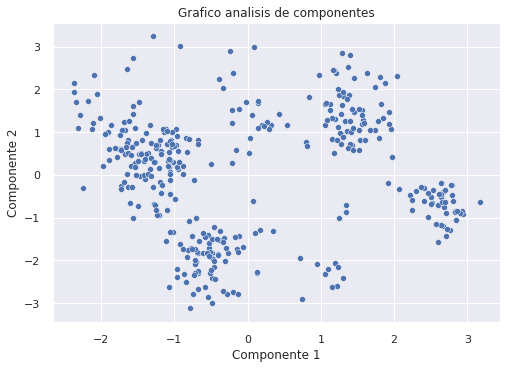

In [ ]:
pca = PCA(n_components=4) # Establecemos el PCA de 4 componentes 
pcs = pca.fit_transform(df) # Lo aplicamos a nuestro dataset codificado

# Gráficamos
plt.title('Grafico analisis de componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

#La grafica nos muestra como se van agrupando, poco a poco, los datos.

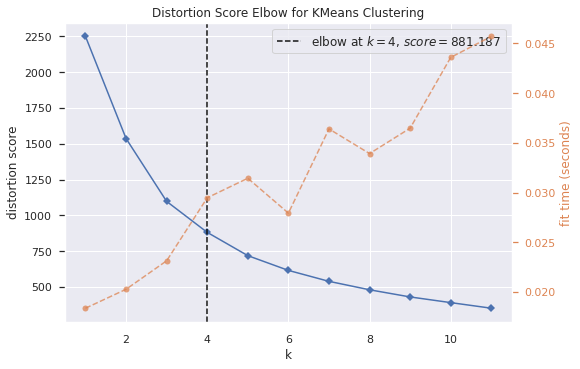

In [ ]:
#Se realiza un analisis de codo, el cual nos ayuda a determinar el mejor numero de clusters (K), para un Kmeans
X = df.values 
# Inicializamos el modelo y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))

visualizer.fit(X) # Hacemos fit a los datos en el visualizados
visualizer.show() # Renderizamos la figura y la mostramos

LA linea Vertical negra, nos reafirma, en el diagrama de codo, cual es el numero de clusters o grupos ideales para dividir el conjunto de datos.

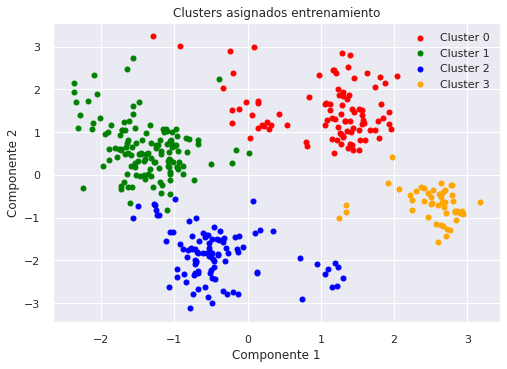

In [ ]:
# segun el analisis de codo, el K ideal es 4, son 4 clusters que se dividirá el dataframe
km = 4
kmeans = KMeans(n_clusters = km, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df1)
labels = kmeans.labels_ #Con esto obtenemos a qué cluster corresponde cada fila.
df2 = np.array(df1) # para poder realizar una grafica de dispercion, el dataframe se pondrá en un array

#Se hace un diagrama de dispersion de las variables que representan el dataframe, coloreados, según el cluster asignado
colores = ['red', 'green', 'blue', 'orange', 'pink', 'violet', 'black', 'brown', 'magenta', 'cyan'] #Lista de 10 colores (se pueden graficar hasta 10 clusteres)
cluster = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9'] #Lista de 10 cluster
#Un For para graficar un Kmeans con un K de 1 a 10.
for i in range(km):
  plt.scatter(df2[y_kmeans == i, 0], df2[y_kmeans == i, 1], s = 100, marker= '.', c = colores[i], label = cluster[i])
plt.legend()
plt.title('Clusters asignados entrenamiento')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

## Explicacion modelo



1.   La gráfica nos muestra una clara division en 4 grupos (clusteres del 0 al 3). 
2.   Los grupos asignados fueron expuestos de la siguiente forma:

*   PAra el Grupo 1 (Cluster 0), Son aquellos cliente con mas de 5 años de antiguedad y con credito tipo 2.
*   Para el Grupo 2 (Cluster 1), Son esos cliente con mas de 5 años de antiguedad y con credito tipo 1. Ademas clientes sin ningun tipo de credito, con mas de 10 años de antiguedad,  Limites Tc de mas de 40 mil y Salarios mayores a 13 mil.
*   Para el Grupo 3 (CLuster 2), Clientes con nuevos, con creditos tipo 1. Tambien se le agregan aquellos clientes con mas años de antiguedad, con salarios inferiores a 20 mil, que no hacen parte del Grupo 1 ni el Grupo 2.
*   Para el Grupo 4 (Cluster 3). Son Clientes nuevos, con credito tipo 2 y clientes con mas años de antiguedad con salarios menores a 15 mil y que no pertenescan a los grupos anteriores.





In [ ]:
#Se muestran la cantidad de registros que componen cada cluster (grupo)
segmentos = pd.DataFrame(labels, columns = ["Segmentos predictivos"])
segmentos.value_counts()

Segmentos predictivos
1                        131
2                        101
0                         94
3                         49
dtype: int64

In [ ]:
#Se hara una validacion por Scoring del modelo
k = 15
kmeans_model2 = []
s_score2 = []
b= []
ch_score2= []
db_score2 = []
df3 = df
for i in range(k):
  a= i+2
  b.append(a)
  kmeans_model1 = (KMeans(n_clusters=a, random_state=19).fit(df3))
  kmeans_model2.append(kmeans_model1)
  labels = (kmeans_model1.labels_) #Con esto obtenemos a qué cluster corresponde cada fila
  s_score2.append(silhouette_score(df3, labels, metric='euclidean'))
  ch_score = calinski_harabasz_score(df3, labels) #No usa el parámetro metric.
  ch_score2.append(ch_score)
  db_score = davies_bouldin_score(df3, labels) #No usa el parámetro metric.
  db_score2.append(db_score)
  df_score = pd.DataFrame(b, columns= ['K'])
df_score['Siluete-score'] = s_score2
df_score["Calinski-Harabasz"] = ch_score2
df_score["Davies-Bouldin"] = db_score2
df_score.head(k)

,K,Siluete-score,Calinski-Harabasz,Davies-Bouldin
0,2,0.332016,173.188573,1.355742
1,3,0.349611,195.333011,1.125140
2,4,0.372515,192.053258,1.067237
3,5,0.392796,196.972832,0.955737
4,6,0.412641,195.957361,0.985169
5,7,0.435293,194.778096,0.990137
6,8,0.452993,193.392636,0.916058
7,9,0.467579,193.523099,0.865552
8,10,0.481739,193.247472,0.845652
9,11,0.465008,190.873967,0.854022


In [ ]:
#Se hallará el valor sugerido, según el Siluete score. Este es el K con mayor scoring.
maximo_Siluete = df_score["Siluete-score"].max()
siluete = df_score.loc[:, ["K"]][df_score["Siluete-score"] == maximo_Siluete]
siluete = int(siluete.values[0])
print(f'El valor del Siluete es {siluete}')

#Se hallará el valor sugerido, según Calinski-Harabasz. Este es el K con mayor scoring.
maximo_Calinski = df_score["Calinski-Harabasz"].max()
calinski = df_score.loc[:, ["K"]][df_score["Calinski-Harabasz"] == maximo_Calinski]
calinski = int(calinski.values[0])
print(f'El valor Calinski-Harabasz es {calinski}')

#Se hallará el valor sugerido, según Davies-Bouldin. Este es el K con menor scoring.
minimo_Davies = df_score["Davies-Bouldin"].min()
davies = df_score.loc[:, ["K"]][df_score["Davies-Bouldin"] == minimo_Davies]
davies = int(davies.values[0])
print(f'El valor Davies-Bouldin es {davies}')



El valor del Siluete es 10
El valor Calinski-Harabasz es 5
El valor Davies-Bouldin es 10


In [ ]:
#Se hará una ponderación, que según los scoring y el K hallado por el diagrama de codo. Esto para ver cual es el K con mayor "votación"

ks = pd.DataFrame({})
ks['Valor K'] = [siluete, calinski, davies, km]
ks.value_counts()

Valor K
10         2
4          1
5          1
dtype: int64

## Explicacion desempeño

1. El desempeño del modelo es regular, ya que según los datos de los score de evaluacion (los que nos dicen si el modelo está bien dividido, en los grupos que son) no son acordes a la division hecha, es decir, según las calificaciones, no es la cantidad optima de divisiones. Hacerlo como nos lo piden las calificiones, serían muchas divisiones, extendiendo a muchos grupos.

In [ ]:
df_original["Grupos"] = y_kmeans

In [ ]:
df_original.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Grupos
0,22572.91,1,0,30136.74,0.0,1,2
1,10079.48,0,1,18135.44,0.0,0,3
2,13871.35,1,0,30831.75,0.0,1,2
3,15610.45,1,0,59690.66,12.3,1,1
4,14119.30,1,0,70880.40,14.3,1,1


In [ ]:
pd.options.display.max_columns = None #Muestra todas las columnas del DataFrame
df_original.sort_values(by=['Grupos'])

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Grupos
255,5471.71,0,1,50655.56,8.0,0,0
180,13820.58,0,1,47951.82,6.2,1,0
94,4056.26,0,1,64502.87,11.7,1,0
181,8347.23,0,1,50955.58,8.1,1,0
182,3686.14,0,1,58115.81,10.5,0,0
...,...,...,...,...,...,...,...
75,9166.34,0,1,22121.15,0.0,1,3
209,10003.10,0,1,27812.86,0.0,1,3
69,9128.03,0,1,7749.14,0.0,0,3
215,9801.89,0,1,14224.48,0.0,1,3


Text(0, 0.5, 'Cantidad de registros')

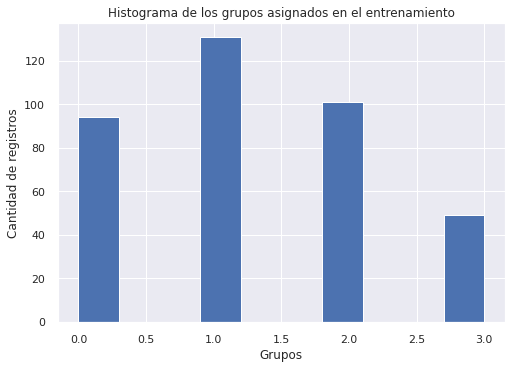

In [ ]:
df_original['Grupos'].hist()
plt.title('Histograma de los grupos asignados en el entrenamiento')
plt.xlabel('Grupos')
plt.ylabel('Cantidad de registros')

Grafico que nos ilustra la cantidad de clientes asignados a cada grupo

In [ ]:
df_original['Grupos'].describe()

count    375.000000
mean       1.280000
std        0.983283
min        0.000000
25%        0.500000
50%        1.000000
75%        2.000000
max        3.000000
Name: Grupos, dtype: float64

In [ ]:
df_original

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Grupos
0,22572.91,1,0,30136.74,0.0,1,2
1,10079.48,0,1,18135.44,0.0,0,3
2,13871.35,1,0,30831.75,0.0,1,2
3,15610.45,1,0,59690.66,12.3,1,1
4,14119.30,1,0,70880.40,14.3,1,1
...,...,...,...,...,...,...,...
370,18922.11,1,0,34553.68,0.0,1,2
371,15538.35,1,0,68179.69,10.5,1,1
372,15004.61,0,1,7726.65,0.0,0,3
373,17148.91,1,0,30516.46,0.0,1,2


In [ ]:
df_original.groupby('Grupos')['Tiempo_cliente'].count()

Grupos
0     94
1    131
2    101
3     49
Name: Tiempo_cliente, dtype: int64

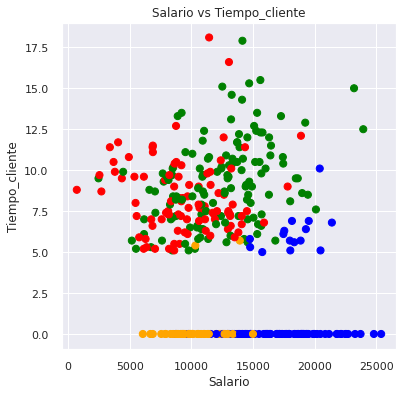

In [ ]:
x = df_original['Salario']
y = df_original['Tiempo_cliente']
colores = np.array(['red', 'green', 'blue', 'orange', 'pink', 'violet', 'black', 'brown', 'magenta', 'cyan'])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y, c=colores[df_original.Grupos], s= 50)
plt.title('Salario vs Tiempo_cliente')
plt.xlabel('Salario')
plt.ylabel('Tiempo_cliente')
plt.show()

Revisando un poco mas el comprotamient en los entrenamientos, el tiempo cliente no influye en el salario del cliente, son datos aletorios, aunque los clientes nuevos si muestran que estan, en su mayoria, en los grupos 3 y 4.

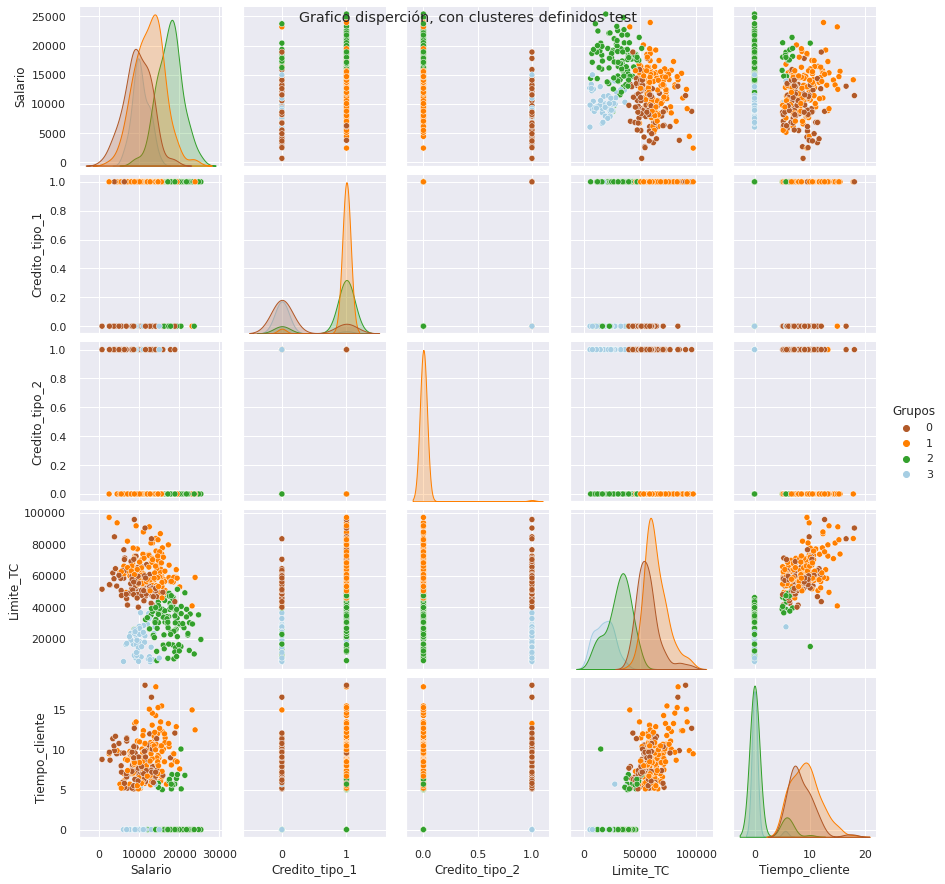

In [ ]:
sns.set()
cols = ['Salario',	'Credito_tipo_1',	'Credito_tipo_2',	'Limite_TC',	'Tiempo_cliente']
g_Dispercion2 = sns.pairplot(df_original, x_vars = cols, y_vars = cols, hue="Grupos", palette = 'Paired_r')
g_Dispercion2.fig.suptitle('Grafico disperción, con clusteres definidos test')
plt.show();

Esta grafica nos muestra el comportamiento de las variables entre ellas, mostrando una amplia claridad entre los tipos de credito, con las otras variables. Mostrando una clara separacion entre los grupos asignados.

## Se hará la prediccion con un nuevo data frame, con 50 registros nuevos.

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/1. DataScienci/proyectoModulo_4/new_costumer.csv')
df_test.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [ ]:
#Se Eliminara la columna "Tipo_de_cliente"
df_test = df_test.drop(columns = 'Tipo_de_cliente')


In [ ]:
df_test.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,19028.02,1,0,18845.91,0.0,1
1,17004.81,1,0,16421.36,0.0,0
2,12973.54,1,0,57295.44,9.6,1
3,13995.43,0,0,23556.17,7.7,0
4,13155.66,0,1,61073.59,10.2,1


In [ ]:
#Se hara el transformado de las variables discretas con la tecnica LabelEncoder, para evitar escalas sin proporción
escalador = StandardScaler()
transformado = escalador.fit_transform(df_test)
transformado = pd.DataFrame(transformado)
transformado.columns = df_test.columns
df_test2 = transformado
df_test2.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01
mean,2.575717e-16,-5.551115e-17,0.000000,-1.824929e-16,3.108624e-17,1.021405e-16
std,1.010153e+00,1.010153e+00,1.010153,1.010153e+00,1.010153e+00,1.010153e+00
min,-2.429636e+00,-1.040833e+00,-1.000000,-2.055131e+00,-7.484612e-01,-1.527525e+00
25%,-6.039861e-01,-1.040833e+00,-1.000000,-7.735628e-01,-7.484612e-01,-1.527525e+00
50%,-6.695947e-02,9.607689e-01,0.000000,3.152309e-02,-7.484612e-01,6.546537e-01
75%,6.229612e-01,9.607689e-01,1.000000,6.802164e-01,8.659167e-01,6.546537e-01
max,1.866933e+00,9.607689e-01,1.000000,2.253618e+00,2.124369e+00,6.546537e-01


In [ ]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0).fit(df_test2)
y_kmeans2 = kmeans.predict(df_test2)
labels = kmeans.labels_ #Con esto obtenemos a qué cluster corresponde cada fila.

In [ ]:
#df_nuevos = pd.read_csv('/content/drive/MyDrive/1. DataScienci/proyectoModulo_4/new_costumer.csv')
#df_nuevos = df_nuevos.drop(columns = 'Tipo_de_cliente')
df_test2.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,1.015202,0.960769,-1.0,-0.977019,-0.748461,0.654654
1,0.660820,0.960769,-1.0,-1.098022,-0.748461,-1.527525
2,-0.045291,0.960769,-1.0,0.941885,1.692173,0.654654
3,0.133701,-1.040833,-1.0,-0.741944,1.209131,-1.527525
4,-0.013392,-1.040833,1.0,1.130442,1.844713,0.654654


In [ ]:
#SE hace el analisis del peso de los componentes dentro del data frame, viendo con cuantos componentes nos ayuda a identificar en comportamiento del dataframe
pca = PCA(n_components=6) # Establecemos el PCA de todos los componentes (se agregan la totalidad de los componentes, 6)
df1 = pca.fit_transform(df_test2) # Lo aplicamos a nuestro dataset codificado
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas. Esto nos da que, al llegar a mas del 85% podriamos decir que el Data
                                       # frame podría estar representado. Trabajaremos con el 95%, que implica que 4 componentes, explican el dataframe


array([0.44034056, 0.69127449, 0.84493191, 0.96535845, 0.98475116,
       1.        ])

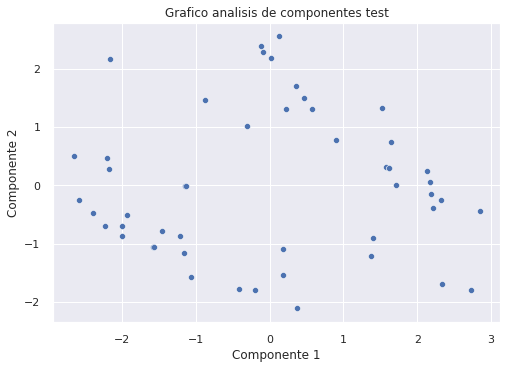

In [ ]:
pca = PCA(n_components=4) # Establecemos el PCA de 4 componentes 
pcs = pca.fit_transform(df_test2) # Lo aplicamos a nuestro dataset codificado

# Gráficamos
plt.title('Grafico analisis de componentes test')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

#La grafica nos muestra como se van agrupando, poco a poco, los datos.

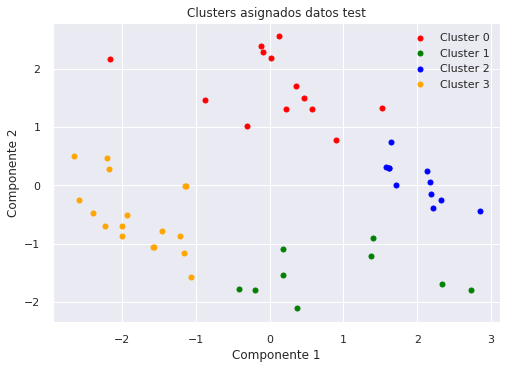

Segmentos predictivos
3                        17
0                        13
2                        11
1                         9
dtype: int64

In [ ]:
df2 = np.array(pcs)

#Se hace un diagrama de dispersion de las variables que representan el dataframe, coloreados, según el cluster asignado
colores = ['red', 'green', 'blue', 'orange', 'pink', 'violet', 'black', 'brown', 'magenta', 'cyan'] #Lista de 10 colores (se pueden graficar hasta 10 clusteres)
cluster = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9'] #Lista de 10 cluster
#Un For para graficar un Kmeans con un K de 1 a 10.
for i in range(km):
  plt.scatter(df2[y_kmeans2 == i, 0], df2[y_kmeans2 == i, 1], s = 100, marker= '.', c = colores[i], label = cluster[i])
plt.legend()
plt.title('Clusters asignados datos test')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()
#Se muestran la cantidad de registros que componen cada cluster (grupo)
segmentos = pd.DataFrame(labels, columns = ["Segmentos predictivos"])
segmentos.value_counts()

Aun en el conjunto de datos para el Test, nos muestra una clara separacion de 4 grupos.

In [ ]:
df3 = df_test
df_test['Grupos'] = labels

In [ ]:
df_General = df_original.merge(df_test, how="outer")
df_General['Grupos'].value_counts()

1    140
2    112
0    107
3     66
Name: Grupos, dtype: int64

In [ ]:
df_General.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Grupos
0,22572.91,1,0,30136.74,0.0,1,2
1,10079.48,0,1,18135.44,0.0,0,3
2,13871.35,1,0,30831.75,0.0,1,2
3,15610.45,1,0,59690.66,12.3,1,1
4,14119.30,1,0,70880.40,14.3,1,1


In [ ]:
df_General2 = df_General.drop(columns = 'Grupos')
#Se hara el transformado de las variables discretas con la tecnica LabelEncoder, para evitar escalas sin proporción
escalador = StandardScaler()
transformado = escalador.fit_transform(df_General2)
transformado = pd.DataFrame(transformado)
transformado.columns = df_General2.columns
df_General2 = transformado
df_General2.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02
mean,-1.671865e-17,1.671865e-17,-4.179663e-17,-2.507798e-17,-2.507798e-17,3.970680e-17
std,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00,1.001179e+00
min,-2.903811e+00,-1.293428e+00,-8.125000e-01,-2.421350e+00,-1.142600e+00,-1.274149e+00
25%,-7.372462e-01,-1.293428e+00,-8.125000e-01,-7.931397e-01,-1.142600e+00,-1.274149e+00
50%,-3.381463e-02,7.731393e-01,-8.125000e-01,1.921960e-01,1.919527e-01,7.848373e-01
75%,6.708932e-01,7.731393e-01,1.230769e+00,6.771749e-01,7.946538e-01,7.848373e-01
max,2.683858e+00,7.731393e-01,1.230769e+00,2.520328e+00,2.753432e+00,7.848373e-01


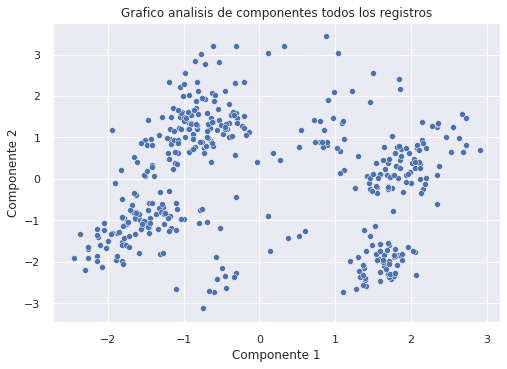

In [ ]:
pca = PCA(n_components=4) # Establecemos el PCA de 4 componentes 
pcs = pca.fit_transform(df_General2) # Lo aplicamos a nuestro dataset codificado

# Gráficamos
plt.title('Grafico analisis de componentes todos los registros')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

#La grafica nos muestra como se van agrupando, poco a poco, los datos.

In [ ]:
y_kmeans = df_General['Grupos'].to_numpy()
#y_kmeans = array(df_General['Grupos'])
y_kmeans

array([2, 3, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 3, 0, 3, 1, 2, 1, 1, 0,
       3, 2, 3, 2, 1, 0, 2, 2, 0, 2, 1, 3, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 2, 0, 1, 2, 0, 3, 2, 1, 3, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 3, 1,
       2, 2, 1, 3, 1, 0, 2, 1, 2, 3, 2, 1, 2, 1, 0, 2, 3, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 3, 3, 0, 2, 3, 3, 1, 0, 2, 0, 3, 2, 1, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 2, 2, 3,
       3, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3, 2, 2, 0, 2, 3,
       1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1,
       1, 0, 3, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 3, 0, 0,
       2, 3, 3, 0, 1, 1, 1, 2, 3, 1, 0, 3, 1, 1, 2, 2, 2, 3, 3, 3, 3, 0,
       1, 0, 3, 2, 1, 1, 2, 1, 0, 3, 1, 1, 2, 2, 0, 1, 3, 0, 0, 2, 3, 2,
       2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 3, 0, 2, 2,
       0, 0, 0, 0, 3, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2,
       2, 1, 2, 0, 3, 2, 0, 2, 0, 1, 2, 1, 1, 3, 2,

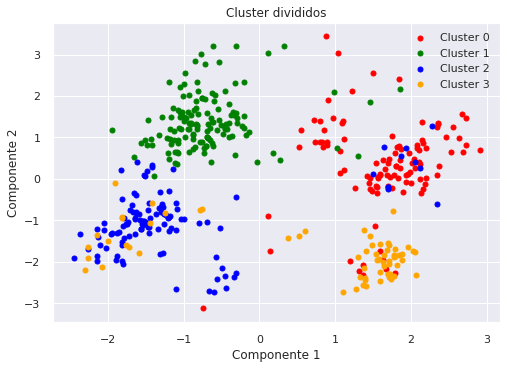

In [ ]:
df2 = np.array(pcs)
#Se hace un diagrama de dispersion de las variables que representan el dataframe, coloreados, según el cluster asignado
colores = ['red', 'green', 'blue', 'orange', 'pink', 'violet', 'black', 'brown', 'magenta', 'cyan'] #Lista de 10 colores (se pueden graficar hasta 10 clusteres)
cluster = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9'] #Lista de 10 cluster
#Un For para graficar un Kmeans con un K de 1 a 10.
for i in range(km):
  plt.scatter(df2[y_kmeans == i, 0], df2[y_kmeans == i, 1], s = 100, marker= '.', c = colores[i], label = cluster[i])
plt.legend()
plt.title('Clusters asignados datos completos')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Cluster divididos')
plt.show()

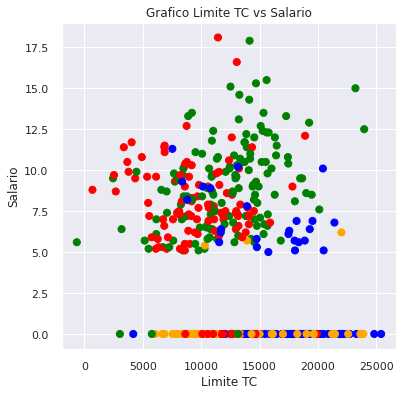

In [ ]:
x = df_General['Salario']
y = df_General['Tiempo_cliente']
colores = np.array(['red', 'green', 'blue', 'orange', 'pink', 'violet', 'black', 'brown', 'magenta', 'cyan'])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y, c=colores[df_General.Grupos], s= 50)
plt.title('Grafico Limite TC vs Salario')
plt.xlabel('Limite TC')
plt.ylabel('Salario')
plt.show()

Esta grafica nos muestra que no hay mayor relevancia entre una comparacion entre Limite Tc y el Salario del cliente, ya que este puede variar en el transcurso del tiempo que se lleve como cliente.

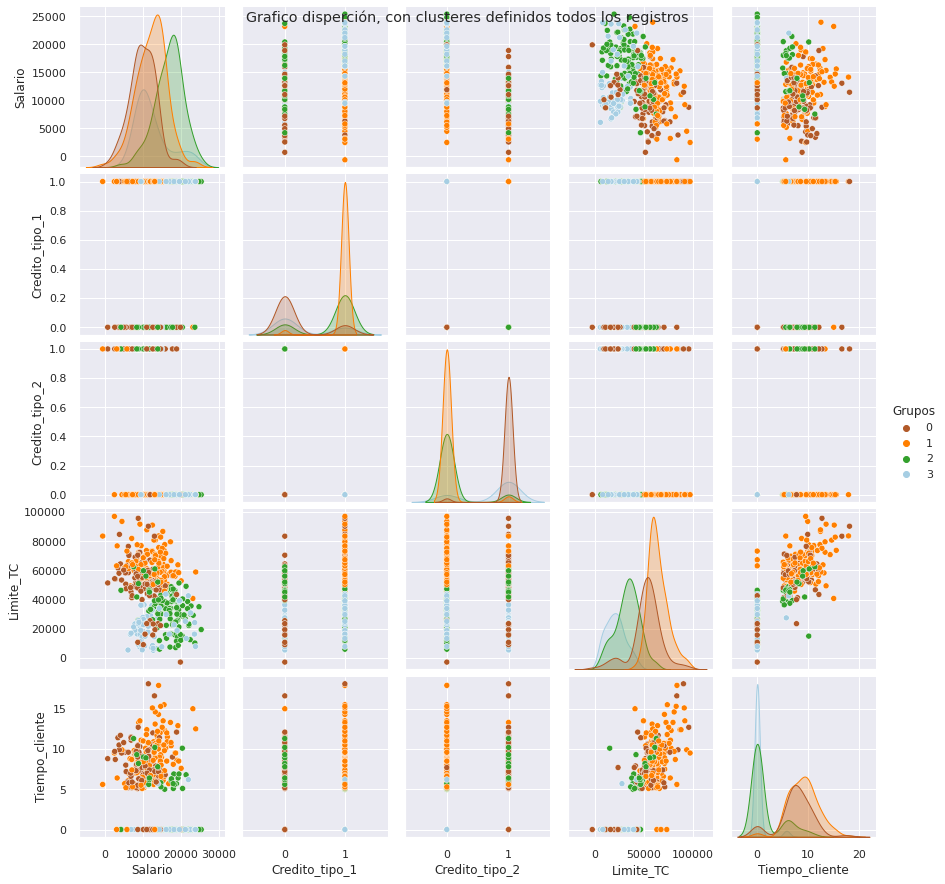

In [ ]:
sns.set()
cols = ['Salario',	'Credito_tipo_1',	'Credito_tipo_2',	'Limite_TC',	'Tiempo_cliente']
g_Dispercion3 = sns.pairplot(df_General, x_vars = cols, y_vars = cols, hue="Grupos", palette = 'Paired_r')
g_Dispercion3.fig.suptitle('Grafico disperción, con clusteres definidos todos los registros')
plt.show();

Como grafico final, nos muestra como actuan las variables entre ellas, con el conjunto de datos completo (entrenamiento y test), mostrando la separacion de los tipos de creditos, segun los grupos asignados a ellos.